In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
URL = 'https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Breast%20cancer%20wisconsin.csv'

In [4]:
data = pd.read_csv(URL)
data.head()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.tail()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
data.drop(['Unnamed: 0'],axis =1, inplace =True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
features_mean= list(data.columns[1:11])
features_mean

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean']

In [9]:
features = data.columns

In [10]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [11]:
data['diagnosis'] = Le.fit_transform(data['diagnosis'])

In [12]:
X = data.loc[:,features_mean]
y = data['diagnosis']

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [62]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.23640517,  1.09706398, -2.07333501,  1.26993369,  0.9843749 ,
         1.56846633,  3.28351467,  2.65287398],
       [-0.23640344,  1.82982061, -0.35363241,  1.68595471,  1.90870825,
        -0.82696245, -0.48707167, -0.02384586],
       [ 0.43174109,  1.57988811,  0.45618695,  1.56650313,  1.55888363,
         0.94221044,  1.05292554,  1.36347845],
       [ 0.43212054, -0.76890929,  0.25373211, -0.59268717, -0.76446379,
         3.28355348,  3.40290899,  1.91589718],
       [ 0.43220141,  1.75029663, -1.15181643,  1.77657315,  1.82622928,
         0.28037183,  0.53934045,  1.37101143]])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 8) (455,)
Test set: (114, 8) (114,)


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
LR = LogisticRegression(max_iter=200)
LR

LogisticRegression(max_iter=200)

In [23]:
LR.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [24]:
Train_Score = LR.score(X_train,y_train)
Train_Score

1.0

In [25]:
Test_Score = LR.score(X_train,y_train)
Test_Score

1.0

In [26]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0])

In [27]:
pd.DataFrame({"Actual Data":y_test,
             "New_predication":yhat})

,Actual Data,New_predication
340,0,0
382,0,0
300,1,1
262,1,1
363,0,0
...,...,...
202,1,1
541,0,0
379,1,1
329,1,1


In [28]:
set(data['diagnosis'])

{0, 1}

In [29]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

1.0

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  0]
 [ 0 80]]


Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


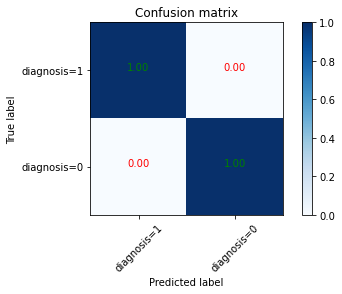

In [36]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['diagnosis=1','diagnosis=0'],normalize= True,  title='Confusion matrix')


In [37]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        34

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [38]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.39071778734525237

In [39]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
print(y_pred_proba)
from sklearn import metrics

[5.10e-02 2.46e-02 9.98e-01 9.95e-01 1.58e-01 1.89e-01 1.88e-03 3.07e-03
 9.48e-01 1.05e-03 9.96e-01 3.92e-02 3.16e-02 5.22e-03 1.90e-02 2.62e-03
 3.56e-03 1.58e-02 4.99e-03 1.22e-02 1.44e-02 5.77e-02 9.71e-01 1.76e-02
 9.61e-03 9.85e-01 3.51e-03 1.64e-03 2.90e-02 9.73e-03 4.22e-03 1.17e-02
 9.43e-03 2.92e-02 1.76e-02 9.97e-01 9.52e-04 9.49e-01 9.95e-01 9.82e-01
 9.54e-01 1.62e-03 9.93e-01 8.31e-02 1.74e-02 1.44e-02 1.26e-01 9.99e-01
 1.12e-03 8.56e-01 9.96e-01 3.29e-02 7.24e-03 1.85e-01 1.90e-02 1.18e-02
 9.58e-01 1.55e-03 6.71e-03 9.97e-01 3.30e-02 4.56e-04 1.24e-02 2.22e-02
 9.77e-04 2.10e-02 4.24e-02 1.34e-02 9.98e-01 1.00e+00 5.46e-02 6.31e-03
 1.45e-02 1.00e+00 1.80e-02 1.00e+00 1.00e+00 8.71e-02 5.55e-04 1.19e-03
 2.31e-02 9.94e-01 9.98e-01 6.65e-02 2.67e-02 5.21e-03 4.77e-03 7.81e-02
 9.80e-01 1.37e-02 1.51e-02 9.96e-01 3.16e-02 9.97e-01 1.00e+00 2.28e-01
 9.81e-01 6.63e-02 1.24e-01 2.67e-04 1.14e-02 9.98e-01 9.95e-01 2.17e-02
 5.91e-03 5.67e-04 3.10e-03 2.24e-02 5.22e-03 1.00e

In [40]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
print(y_pred_proba)
from sklearn import metrics

[5.10e-02 2.46e-02 9.98e-01 9.95e-01 1.58e-01 1.89e-01 1.88e-03 3.07e-03
 9.48e-01 1.05e-03 9.96e-01 3.92e-02 3.16e-02 5.22e-03 1.90e-02 2.62e-03
 3.56e-03 1.58e-02 4.99e-03 1.22e-02 1.44e-02 5.77e-02 9.71e-01 1.76e-02
 9.61e-03 9.85e-01 3.51e-03 1.64e-03 2.90e-02 9.73e-03 4.22e-03 1.17e-02
 9.43e-03 2.92e-02 1.76e-02 9.97e-01 9.52e-04 9.49e-01 9.95e-01 9.82e-01
 9.54e-01 1.62e-03 9.93e-01 8.31e-02 1.74e-02 1.44e-02 1.26e-01 9.99e-01
 1.12e-03 8.56e-01 9.96e-01 3.29e-02 7.24e-03 1.85e-01 1.90e-02 1.18e-02
 9.58e-01 1.55e-03 6.71e-03 9.97e-01 3.30e-02 4.56e-04 1.24e-02 2.22e-02
 9.77e-04 2.10e-02 4.24e-02 1.34e-02 9.98e-01 1.00e+00 5.46e-02 6.31e-03
 1.45e-02 1.00e+00 1.80e-02 1.00e+00 1.00e+00 8.71e-02 5.55e-04 1.19e-03
 2.31e-02 9.94e-01 9.98e-01 6.65e-02 2.67e-02 5.21e-03 4.77e-03 7.81e-02
 9.80e-01 1.37e-02 1.51e-02 9.96e-01 3.16e-02 9.97e-01 1.00e+00 2.28e-01
 9.81e-01 6.63e-02 1.24e-01 2.67e-04 1.14e-02 9.98e-01 9.95e-01 2.17e-02
 5.91e-03 5.67e-04 3.10e-03 2.24e-02 5.22e-03 1.00e